# Data Cleaning

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CnA-Project/Mumbai_train_final.csv')
df['Burden'] = df['Footfall (lakhs)']/df['Platforms']

df['Age'] = 2025 - df['Year of Opening']
k = (df['Platforms'].sum()/df.shape[0]).astype(int)
k2 = (df['Tracks'].sum()/df.shape[0]).astype(int)

df['Platforms'] = df['Platforms'].fillna(k)
df['Tracks'] = df['Tracks'].fillna(k2)
df['Distance From Previous of the Line'] = df['Distance From Previous of the Line'].replace('[KM]','',regex = True).astype(int)
df['Time taken From Previous of the Line'] = df['Time taken From Previous of the Line'].replace('[min]','',regex = True).astype(int)

df

,Station,Station Code,Line,Distance From Previous of the Line,Time taken From Previous of the Line,Platforms,Tracks,Year of Opening,Footfall (lakhs),Attraction Popularity Score,Burden,Age
0,Churchgate,CCG,Western,0,0,4.0,4.0,1867.0,9.00,12.00,2.2500,158.0
1,Marine Lines,MEL,Western,1,3,4.0,4.0,1867.0,9.01,12.00,2.2525,158.0
2,Charni Road,CYR,Western,1,2,4.0,4.0,1867.0,6.00,13.00,1.5000,158.0
3,Grant Road,GTR,Western,1,3,4.0,4.0,NaN,7.20,9.00,1.8000,NaN
4,Mumbai Central,MMCT,Western,1,2,9.0,9.0,1930.0,11.25,12.00,1.2500,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
197,Neral,NRL,Neral-Matheran,0,0,2.0,2.0,NaN,1.53,4.59,0.7650,NaN
198,Jumapatti,JTT,Neral-Matheran,5,46,3.0,4.0,NaN,1.54,4.62,NaN,NaN
199,Waterpipe,WTP,Neral-Matheran,6,46,3.0,4.0,NaN,1.55,4.65,NaN,NaN
200,Aman Lodge,AMNA,Neral-Matheran,7,50,3.0,4.0,NaN,1.56,4.68,NaN,NaN


Marine Lines
Grant Road
Mumbai Central
CSMT
CSMT
CSMT


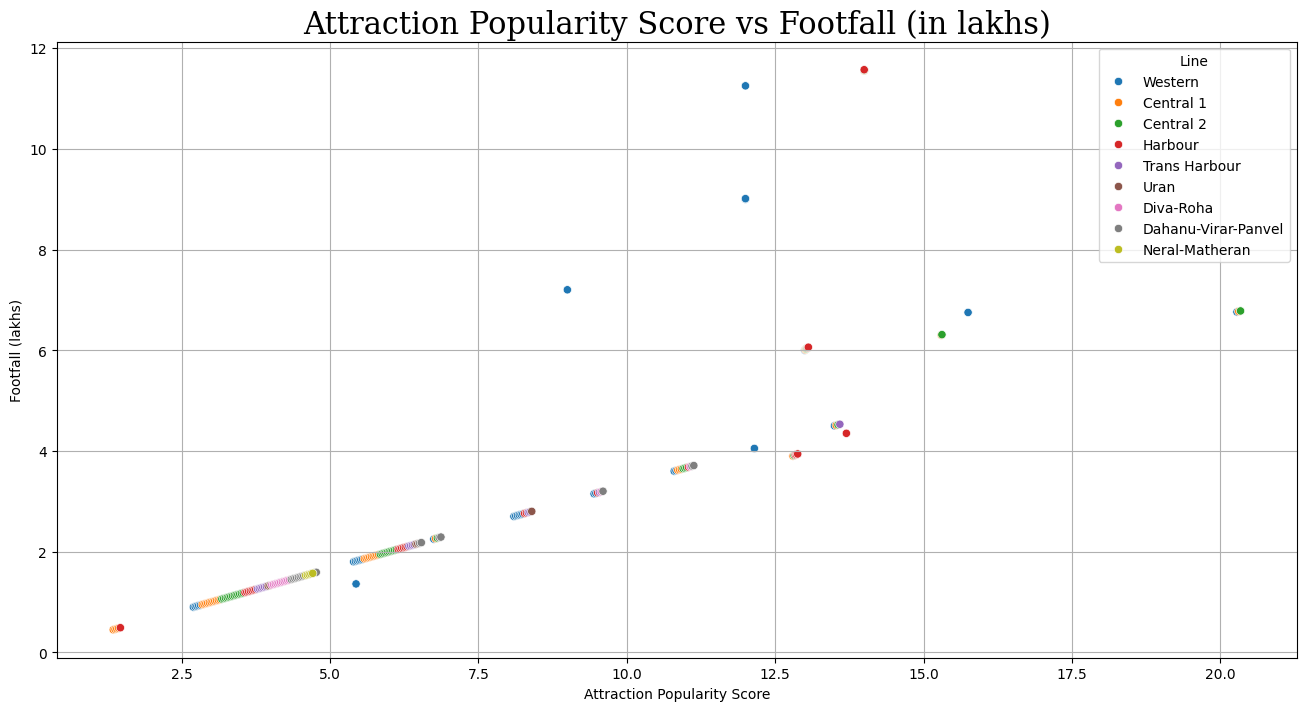

In [11]:
plt.figure(figsize = (16,8))

hue_order = ['Western','Central 1','Central 2','Harbour','Uran','Trans Harbour','Diva-Roha','Dahanu-Virar-Panvel','Neral-Matheran']
sns.scatterplot(x = 'Attraction Popularity Score',y = 'Footfall (lakhs)',hue = 'Line',data = df,marker = 'o')
for i in range(1,202):
    if (df.iloc[i,8]>7):
        print(df.iloc[i,0])
plt.title('Attraction Popularity Score vs Footfall (in lakhs)',fontdict = {'size' : 22,'family':'Serif'})
plt.grid()
plt.show()

In [13]:
df1 = df.sort_values(by = 'Burden' ,ascending = False)
df2 = df1[df1['Burden']>2]

df2

,Station,Station Code,Line,Distance From Previous of the Line,Time taken From Previous of the Line,Platforms,Tracks,Year of Opening,Footfall (lakhs),Attraction Popularity Score,Burden,Age
82,Currey Road,CRD,Central 2,1,2,2.0,4.0,1915.0,6.31,15.31,3.1550,110.0
42,Currey Road,CRD,Central 1,1,2,2.0,4.0,1915.0,6.30,15.30,3.1500,110.0
1,Marine Lines,MEL,Western,1,3,4.0,4.0,1867.0,9.01,12.00,2.2525,158.0
5,Mahalakshmi,MX,Western,1,3,3.0,3.0,1867.0,6.75,15.75,2.2500,158.0
0,Churchgate,CCG,Western,0,0,4.0,4.0,1867.0,9.00,12.00,2.2500,158.0


# Box Plot of Footfall Distribution by Line

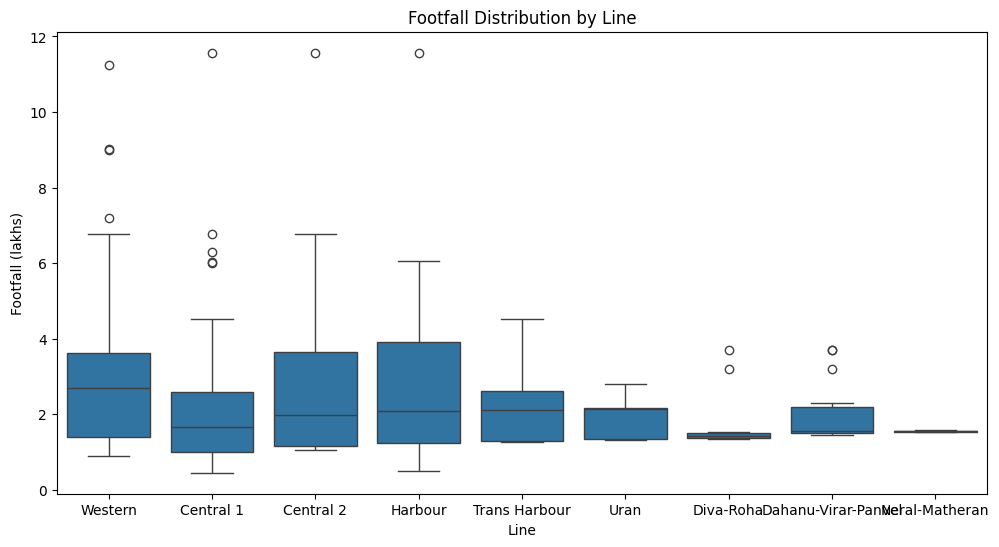

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Line', y='Footfall (lakhs)', data=df)
plt.title('Footfall Distribution by Line')
plt.xlabel('Line')
plt.ylabel('Footfall (lakhs)')
plt.show()

# Pie plot of Footfall distribution for each line

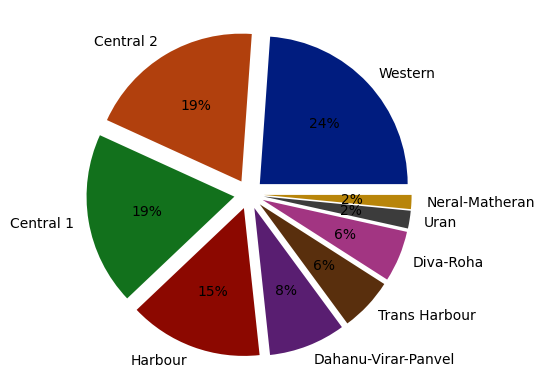

In [14]:
v = df.groupby(['Line'])['Footfall (lakhs)'].sum().reset_index().sort_values(by = 'Footfall (lakhs)',ascending = False)
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
palette_color = sns.color_palette('dark')
plt.pie(v['Footfall (lakhs)'], labels=v['Line'], colors=palette_color,explode = explode, autopct='%.0f%%')
plt.show()

# Bar Plot of Footfalldistribution per line

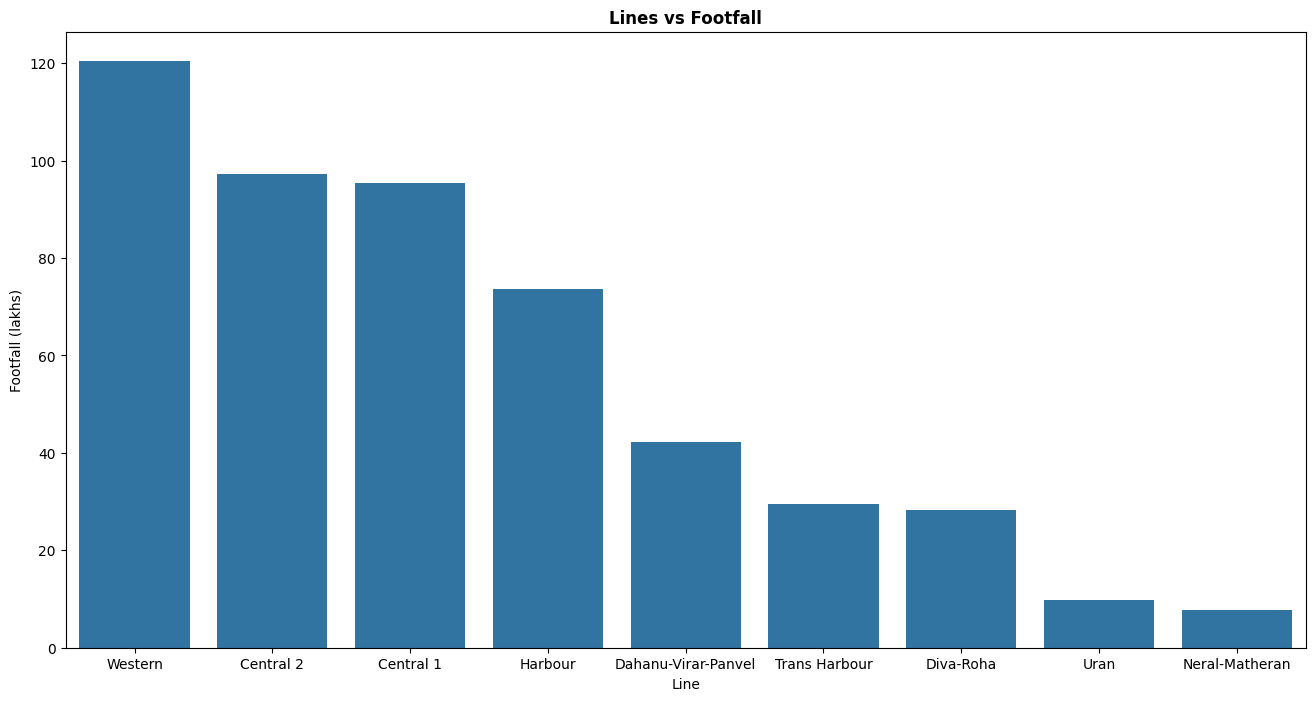

In [17]:
v = df.groupby(['Line'])['Footfall (lakhs)'].sum().reset_index().sort_values(by = 'Footfall (lakhs)',ascending = False)
plt.figure(figsize = (16,8))
sns.barplot(data = v,x='Line',y='Footfall (lakhs)')
plt.title('Lines vs Footfall',fontweight = 'bold')
plt.show()

## Also we can calulate the average footfall per station for each line

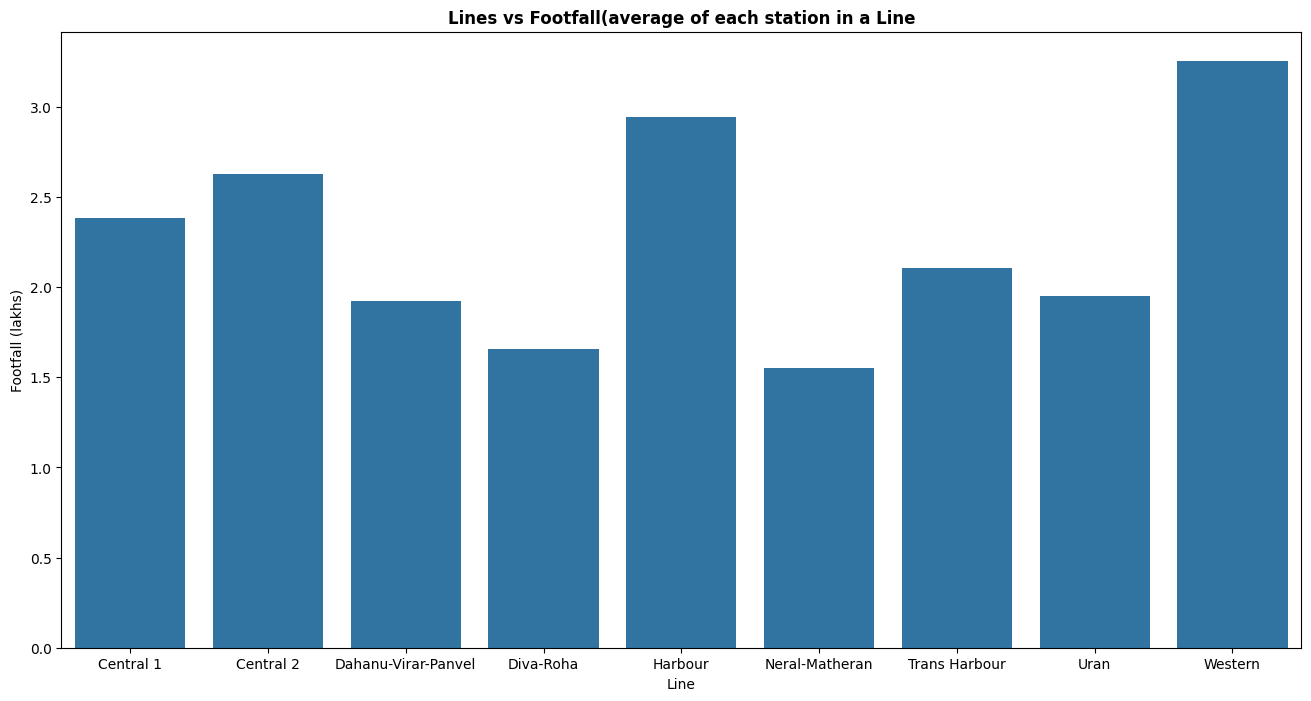

In [92]:
v = df.groupby(['Line'])['Footfall (lakhs)'].mean().reset_index()
v
plt.figure(figsize = (16,8))
sns.barplot(data = v,x='Line',y='Footfall (lakhs)')
plt.title('Lines vs Footfall(average of each station in a Line',fontweight = 'bold')
plt.show()

# Attraction Popularity Score anf Footfall with the Stations
## Here the Stations are marked by distance from previous Station

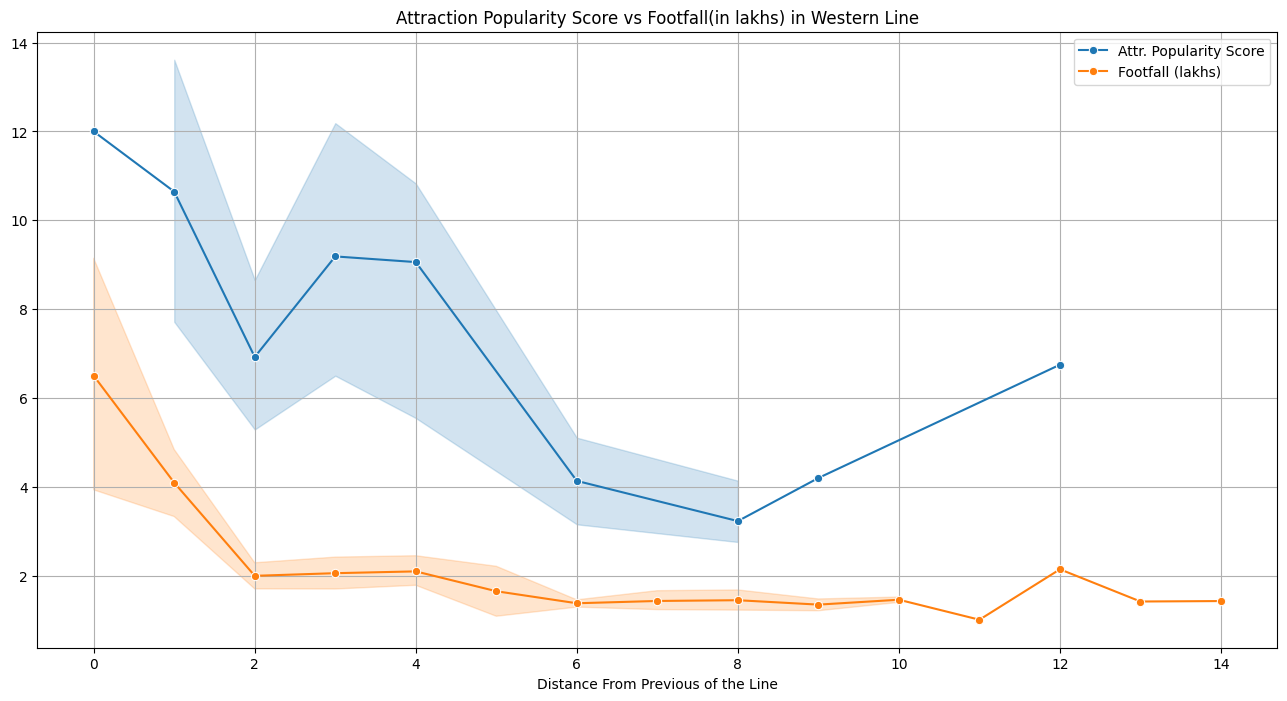

In [26]:
df1 = df[df['Line'] == 'Western']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Western Line')
plt.ylabel('')
plt.grid()
plt.show()

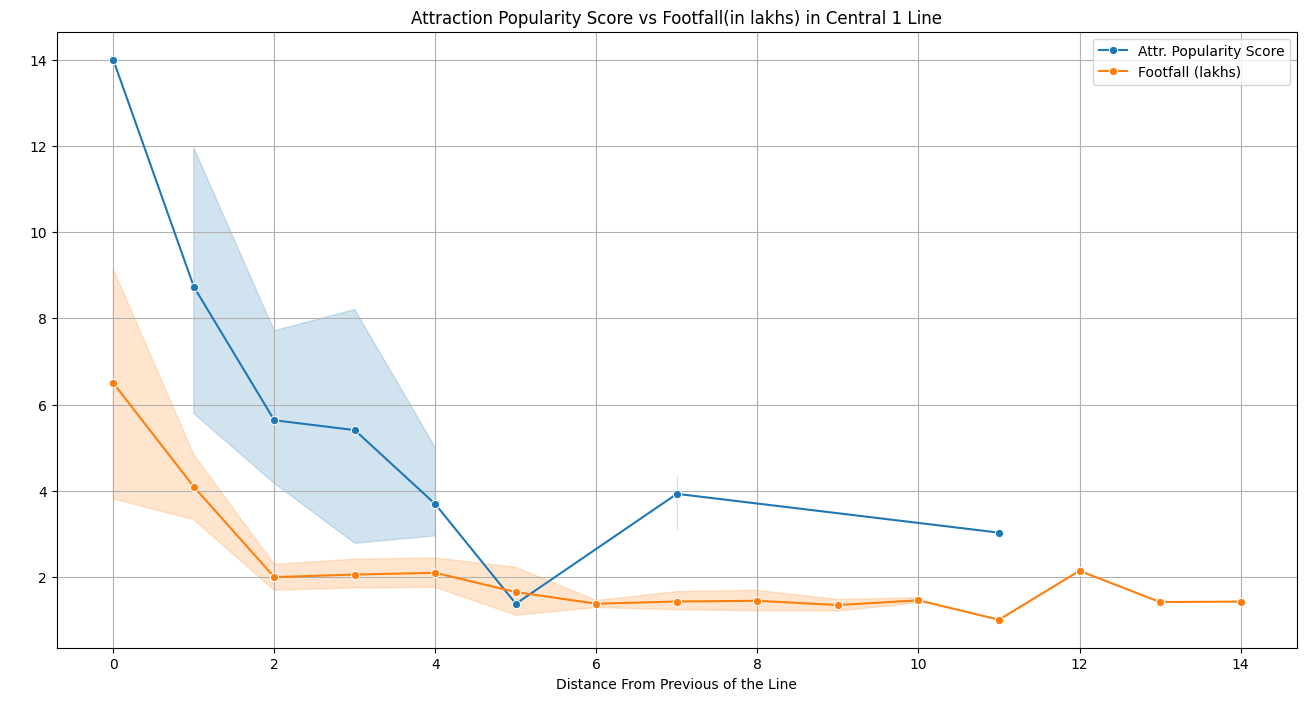

In [25]:
df1 = df[df['Line'] == 'Central 1']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Central 1 Line')
plt.ylabel(' ')
plt.grid()
plt.show()

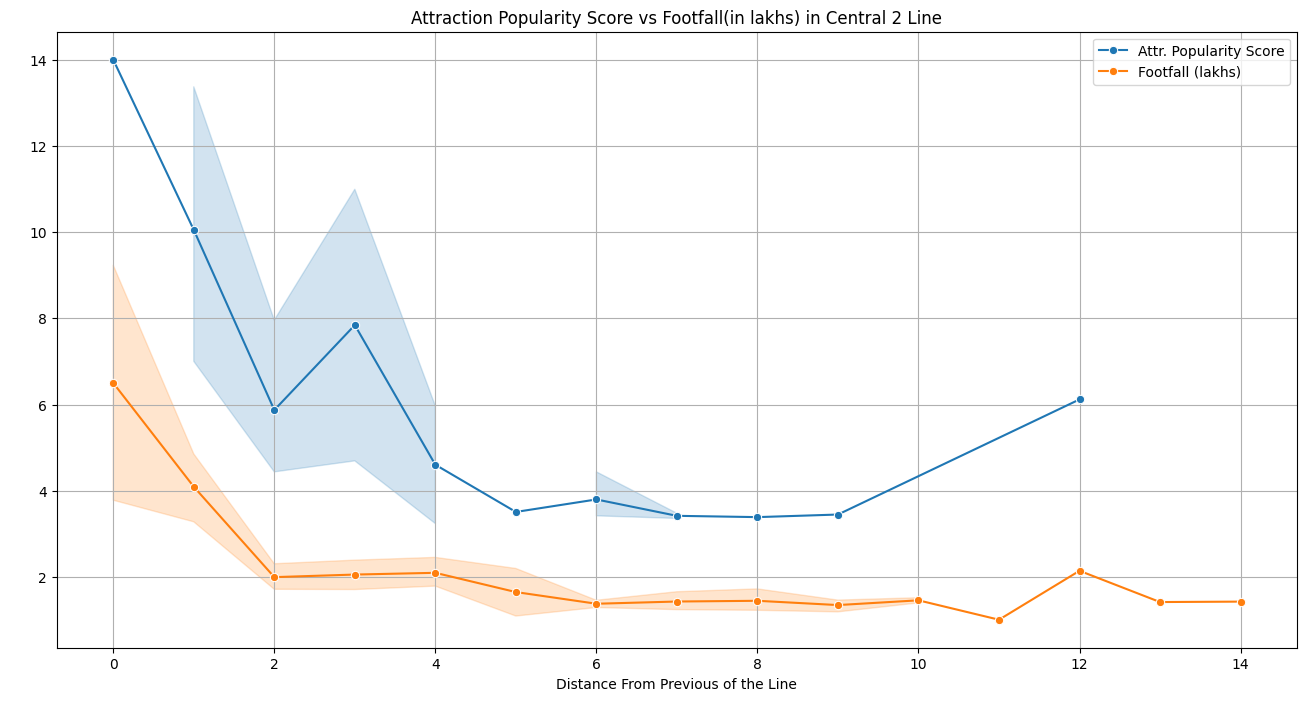

In [27]:
df1 = df[df['Line'] == 'Central 2']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Central 2 Line')
plt.ylabel(' ')
plt.grid()
plt.show()

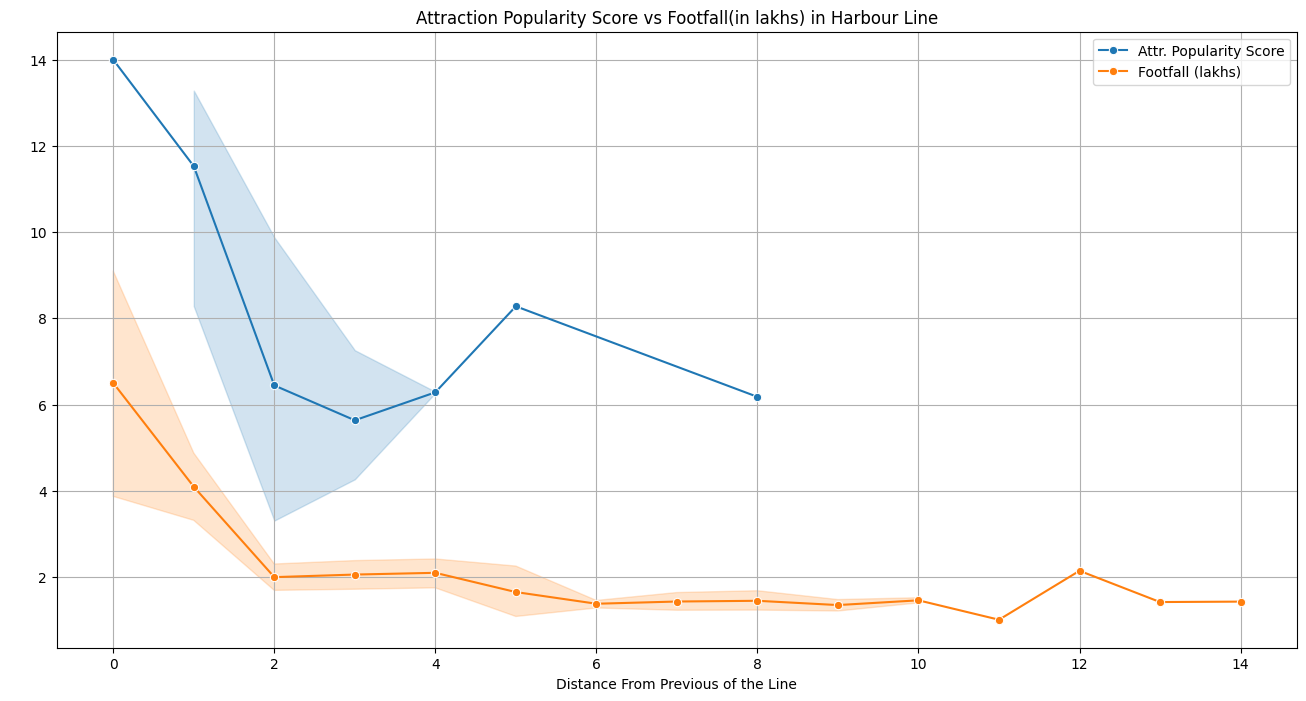

In [28]:
df1 = df[df['Line'] == 'Harbour']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Harbour Line')
plt.ylabel(' ')
plt.grid()
plt.show()

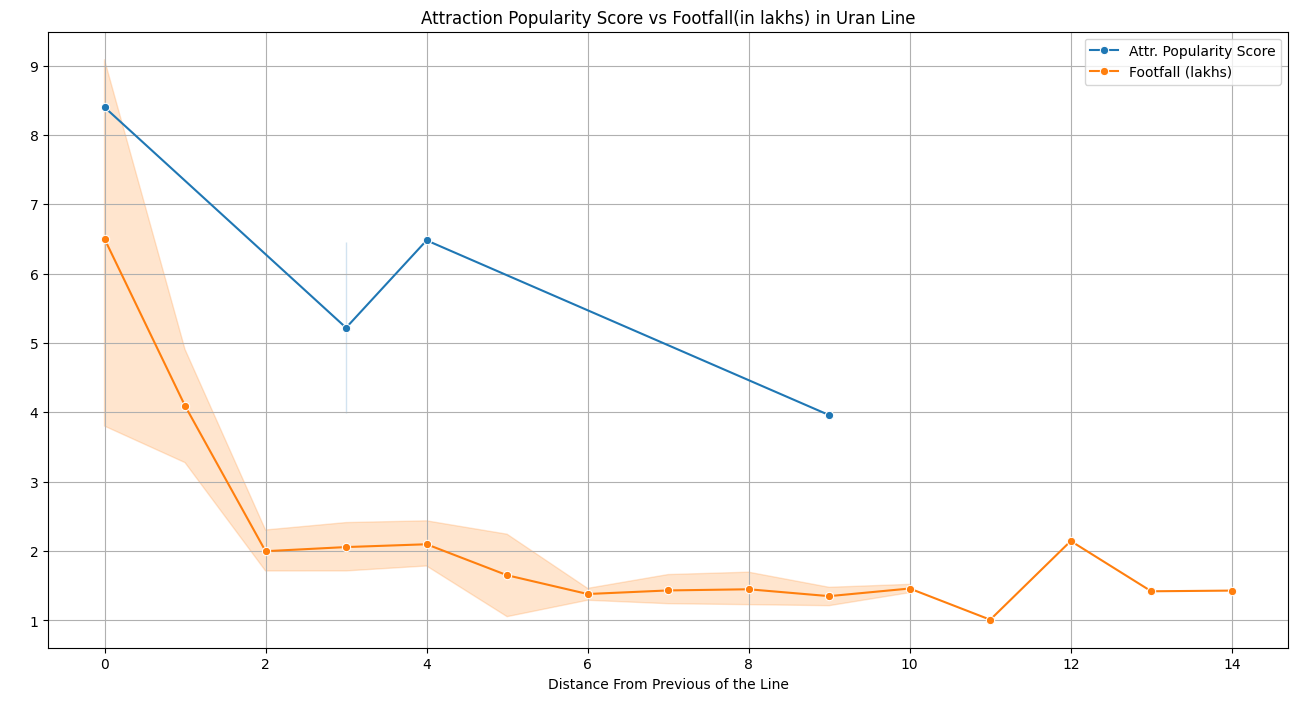

In [29]:
df1 = df[df['Line'] == 'Uran']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Uran Line')
plt.ylabel(' ')
plt.grid()
plt.show()

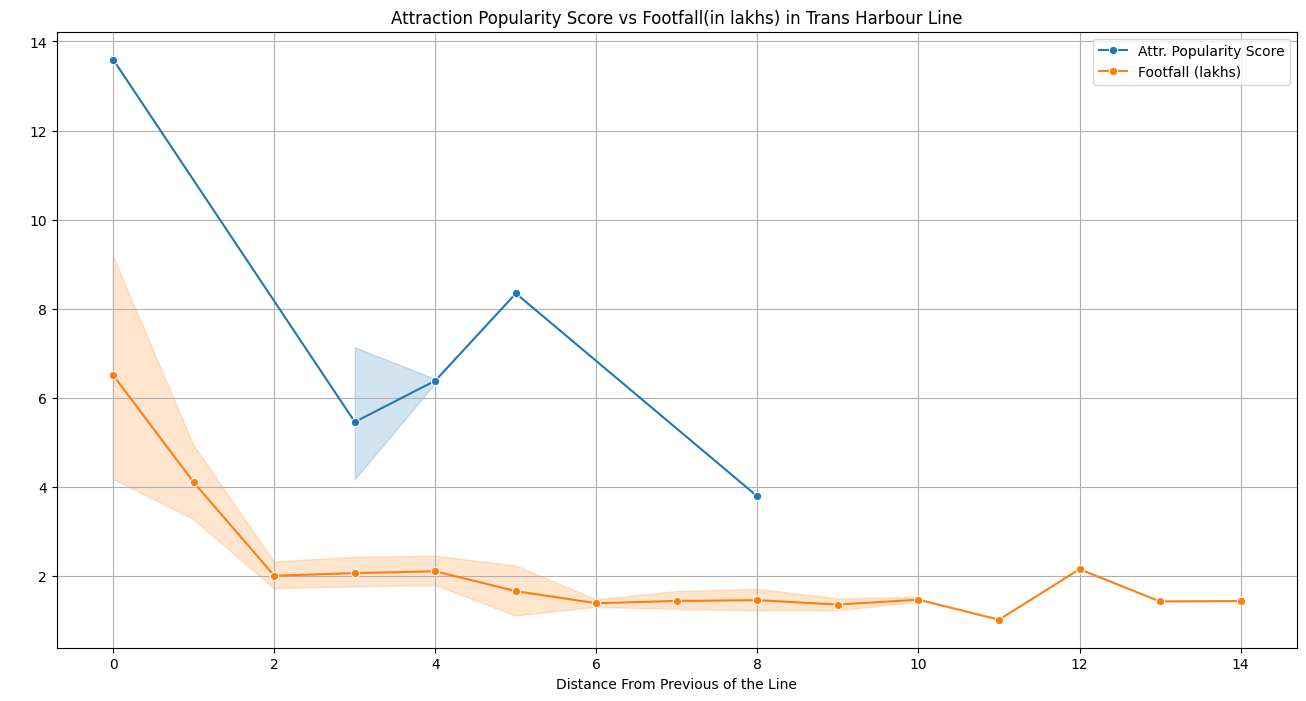

In [30]:
df1 = df[df['Line'] == 'Trans Harbour']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Trans Harbour Line')
plt.ylabel(' ')
plt.grid()
plt.show()

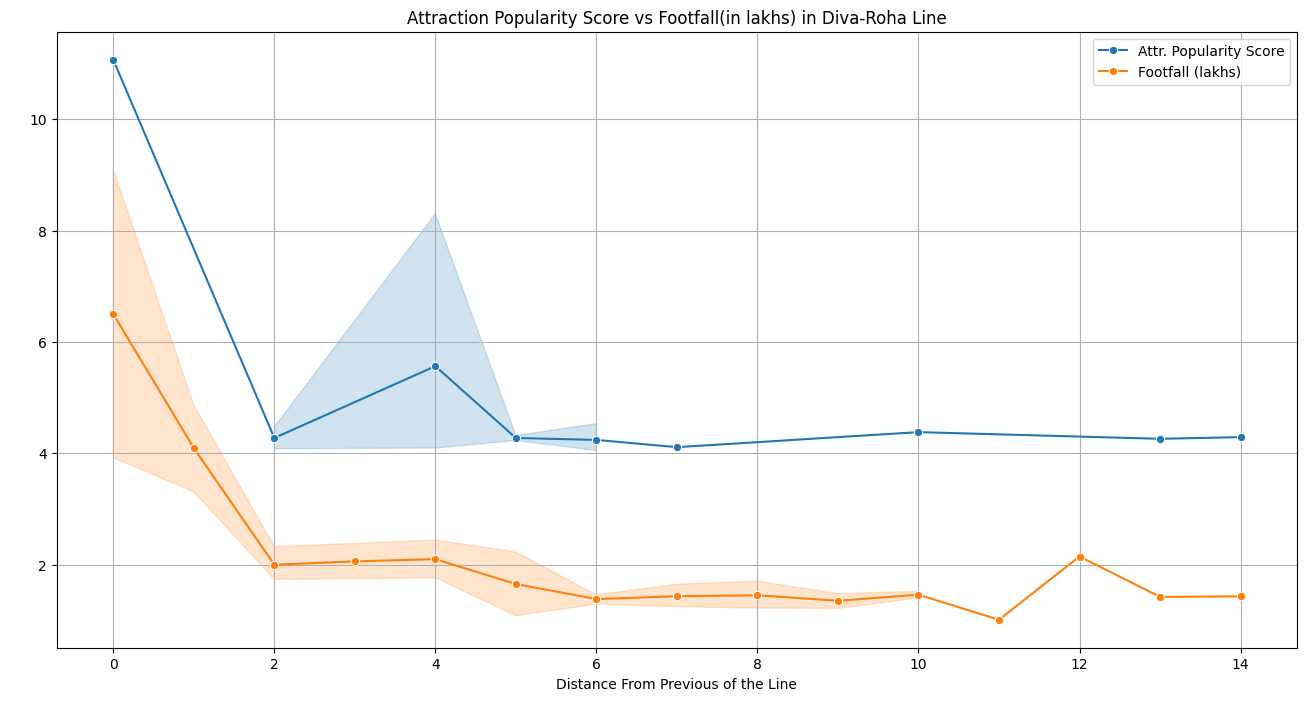

In [32]:
df1 = df[df['Line'] == 'Diva-Roha']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Diva-Roha Line')
plt.ylabel(' ')
plt.grid()
plt.show()

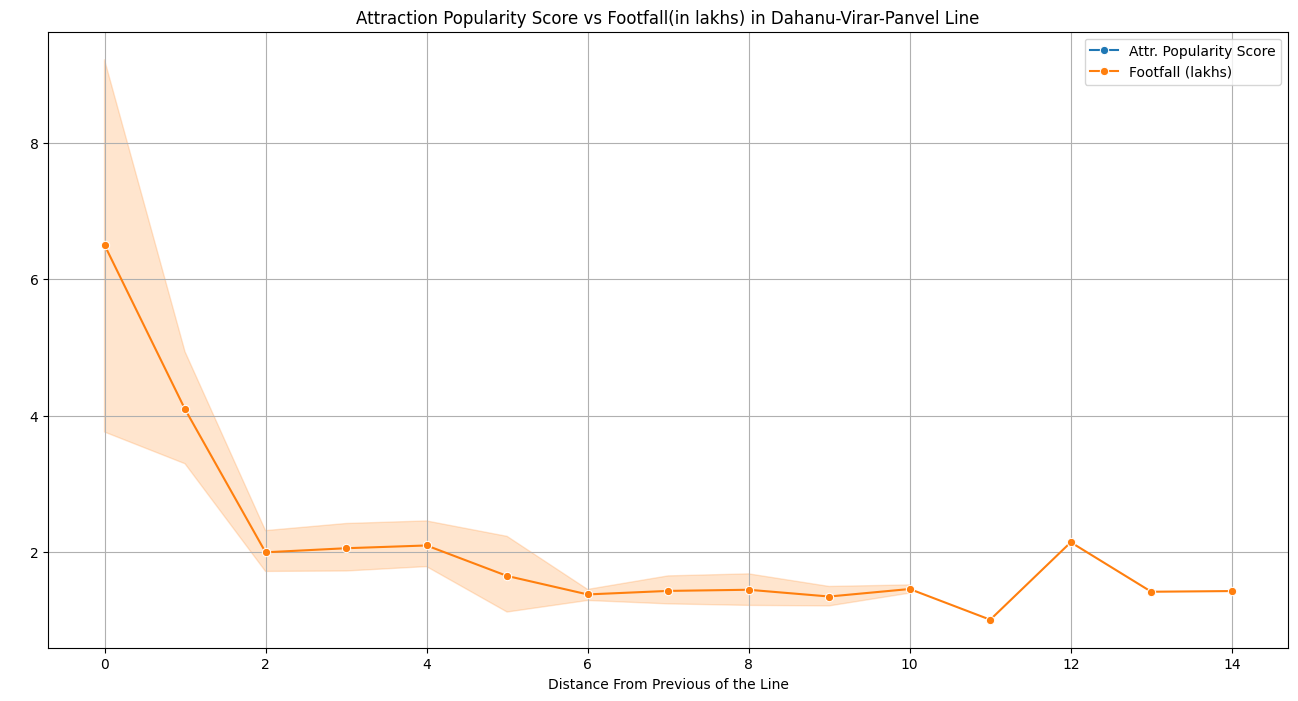

In [34]:
df1 = df[df['Line'] == 'Dahanu-Verar-Panvel']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Dahanu-Virar-Panvel Line')
plt.ylabel(' ')
plt.grid()
plt.show()

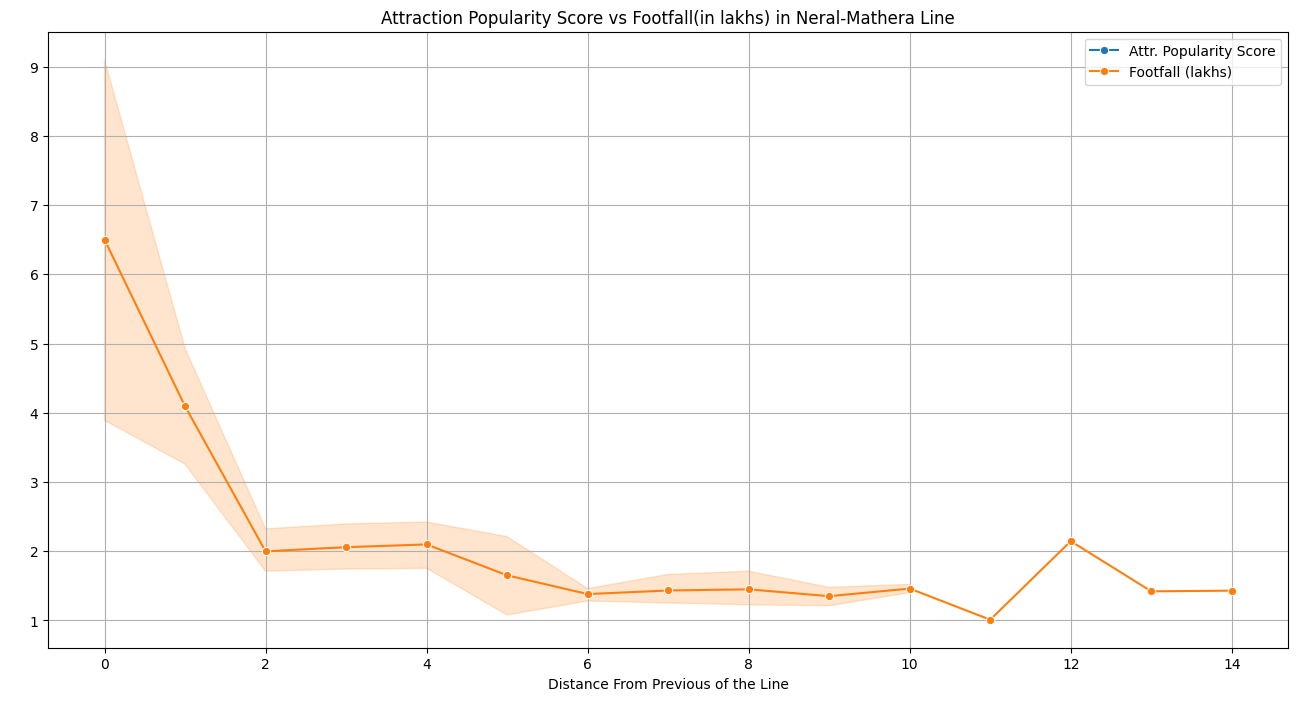

In [36]:
df1 = df[df['Line'] == 'Neral-Mathera']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Attraction Popularity Score',data = df1,label = 'Attr. Popularity Score',marker = 'o')
sns.lineplot(x = 'Distance From Previous of the Line',y = 'Footfall (lakhs)',data = df,label = 'Footfall (lakhs)',marker = 'o')
plt.title('Attraction Popularity Score vs Footfall(in lakhs) in Neral-Mathera Line')
plt.ylabel(' ')
plt.grid()
plt.show()

### Here it is seen that both have almost similar trend and very few exceptions that do not obey the trend of each other.

## Now we see the graphs for Attraction Popularity Score v/s Burden

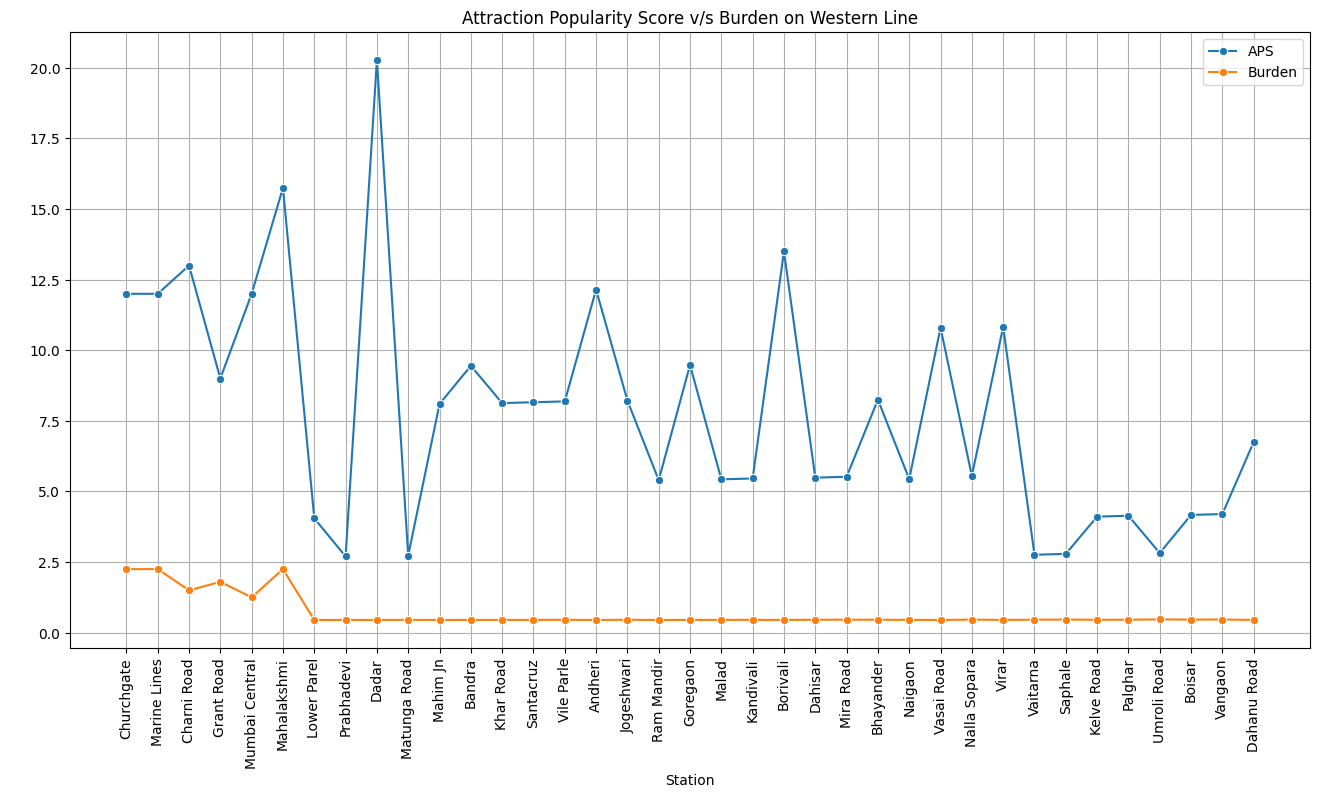

In [94]:
df1 = df[df['Line'] == 'Western']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on Western Line')
plt.ylabel(' ')
plt.grid()
plt.show()

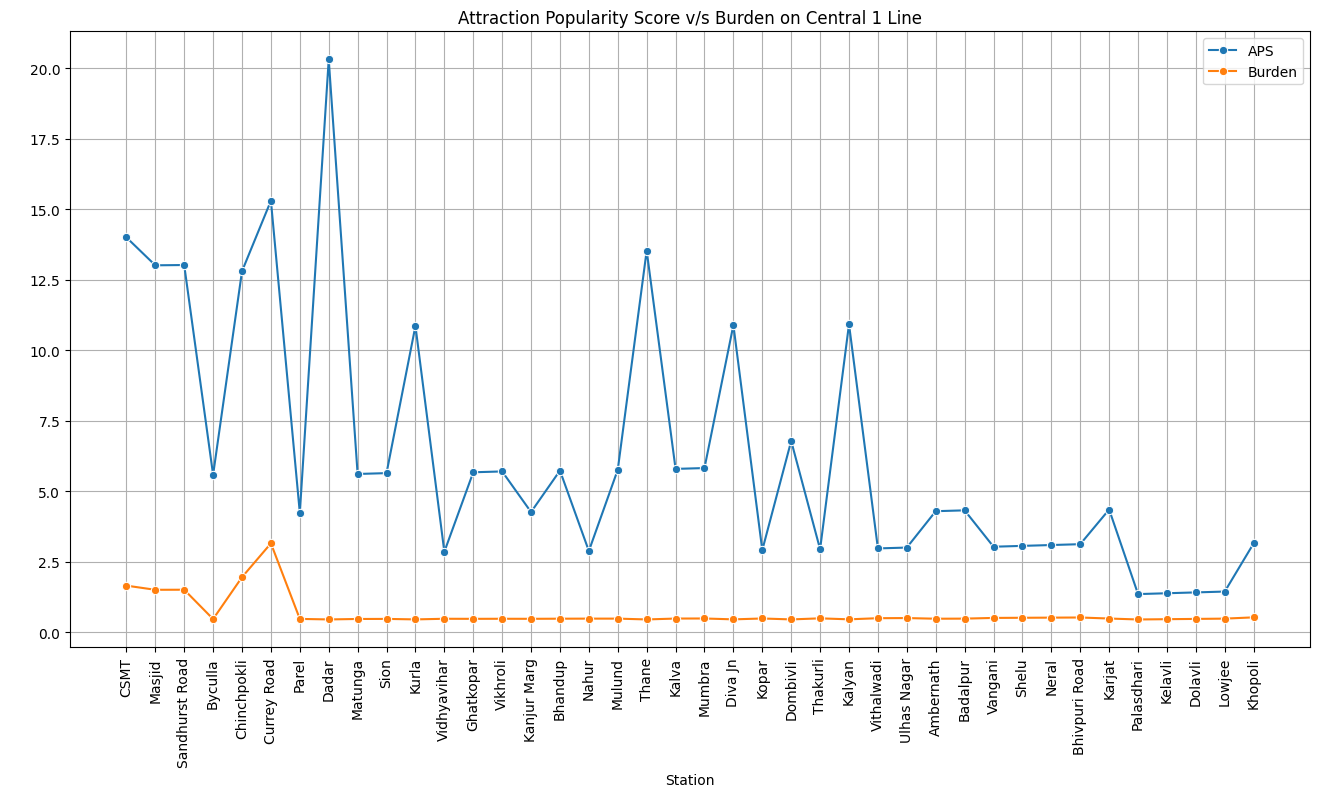

In [95]:
df1 = df[df['Line'] == 'Central 1']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on Central 1 Line')
plt.ylabel(' ')
plt.grid()
plt.show()

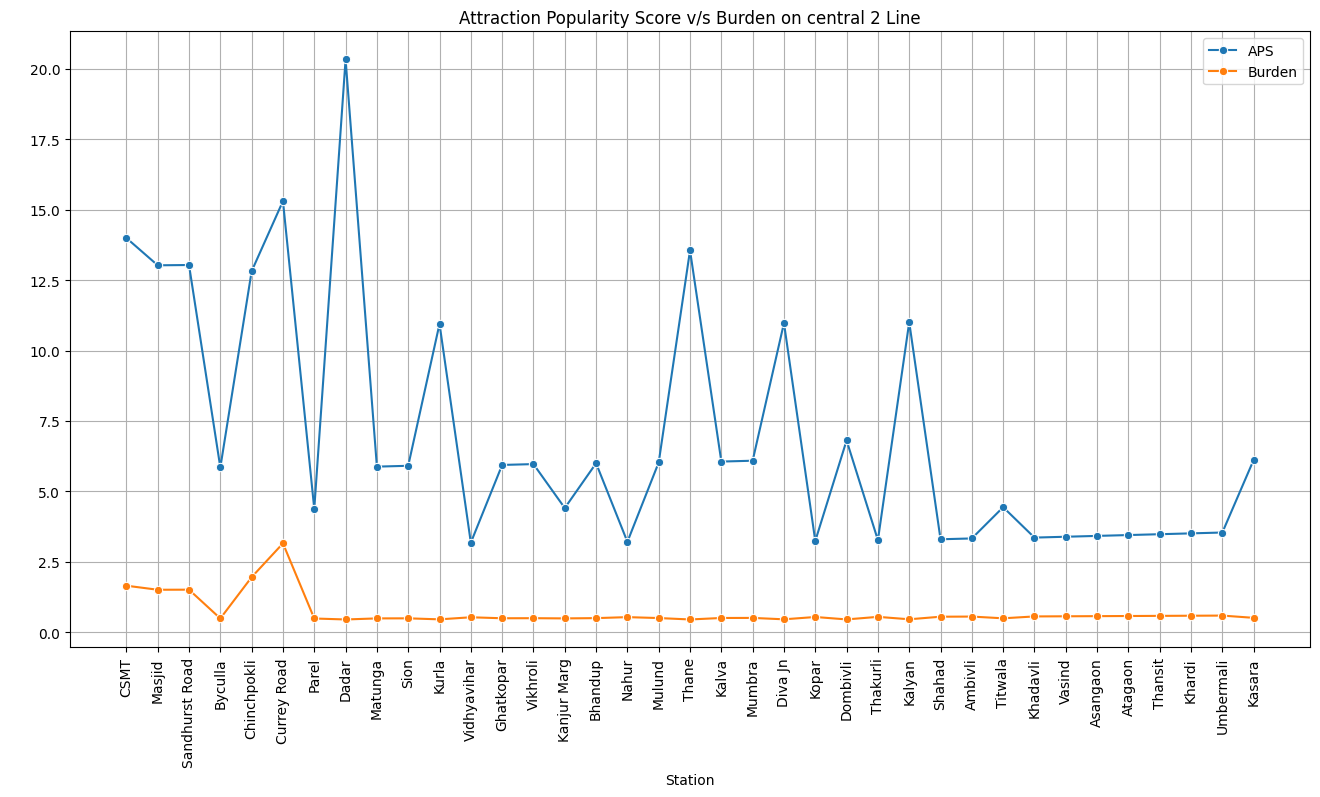

In [96]:
df1 = df[df['Line'] == 'Central 2']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on central 2 Line')
plt.ylabel(' ')
plt.grid()
plt.show()

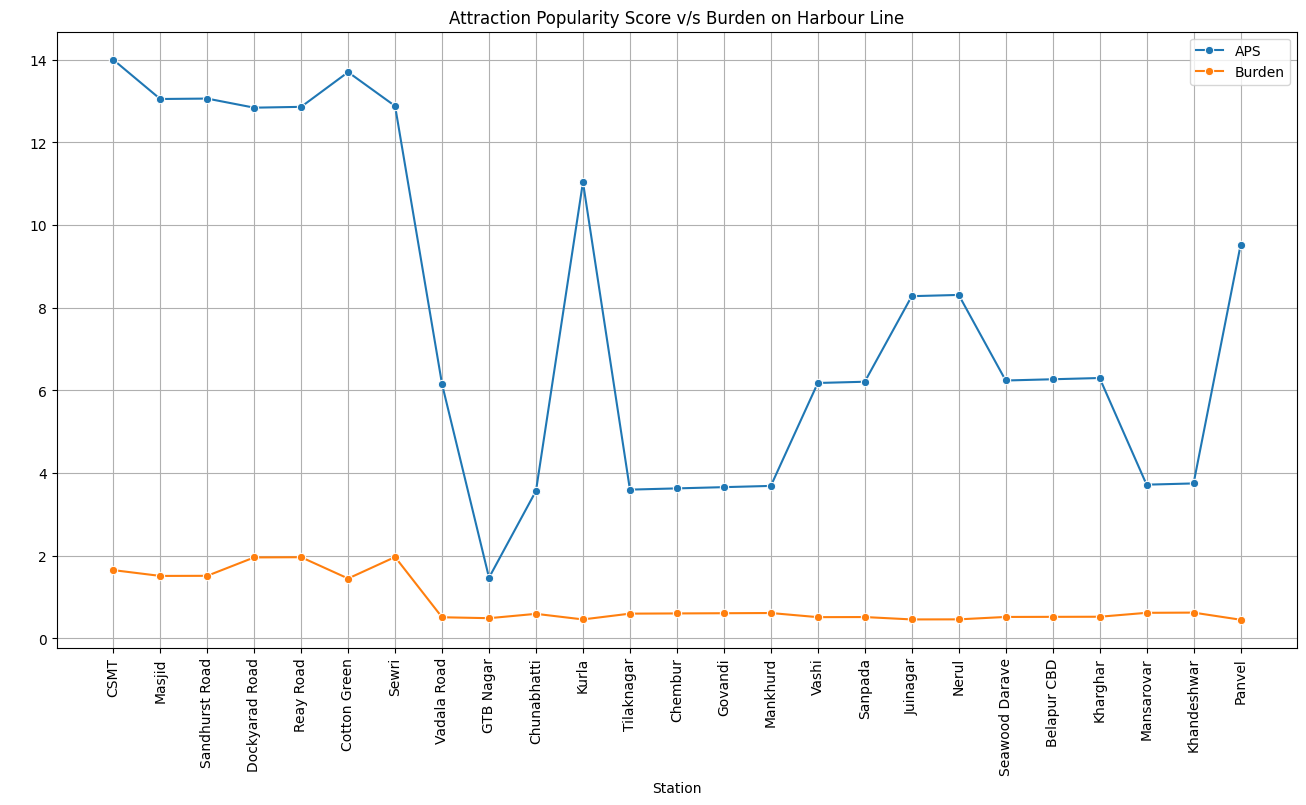

In [97]:
df1 = df[df['Line'] == 'Harbour']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on Harbour Line')
plt.ylabel(' ')
plt.grid()
plt.show()

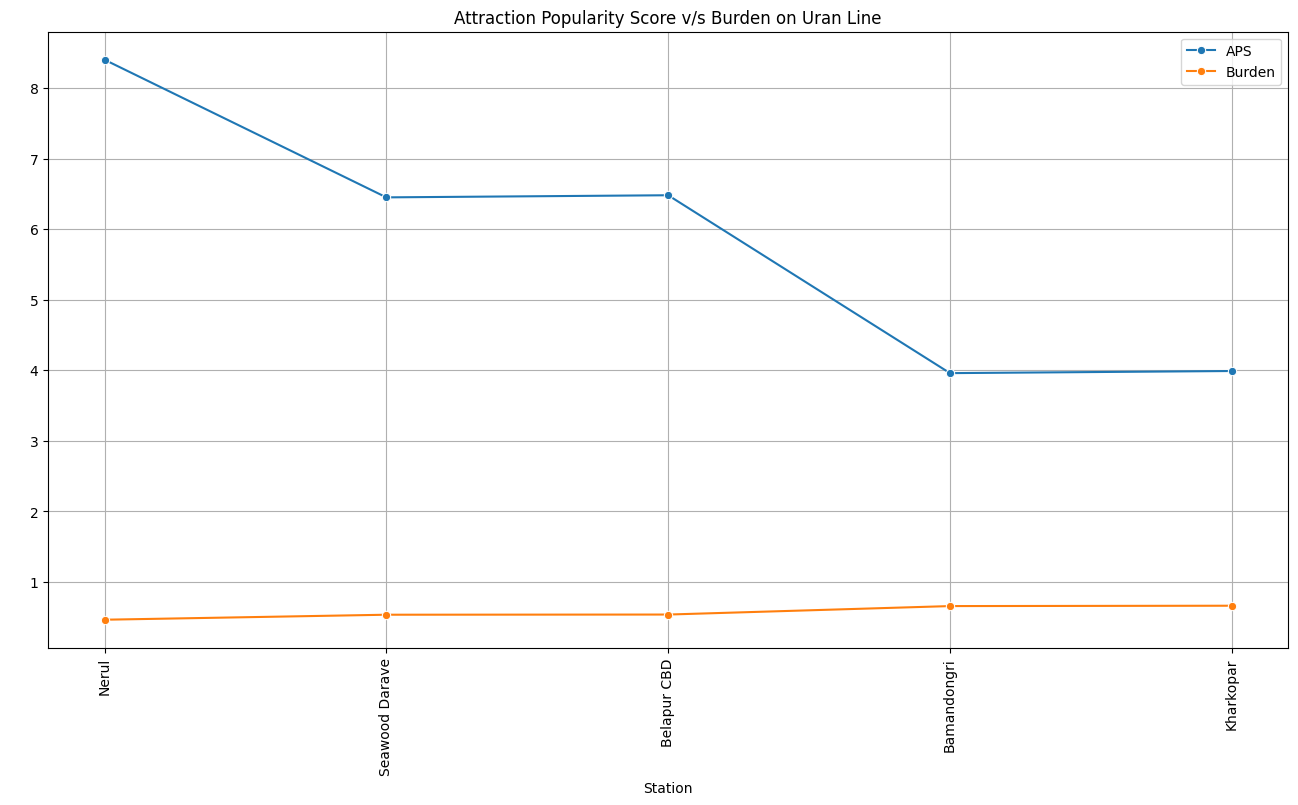

In [98]:
df1 = df[df['Line'] == 'Uran']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on Uran Line')
plt.ylabel(' ')
plt.grid()
plt.show()

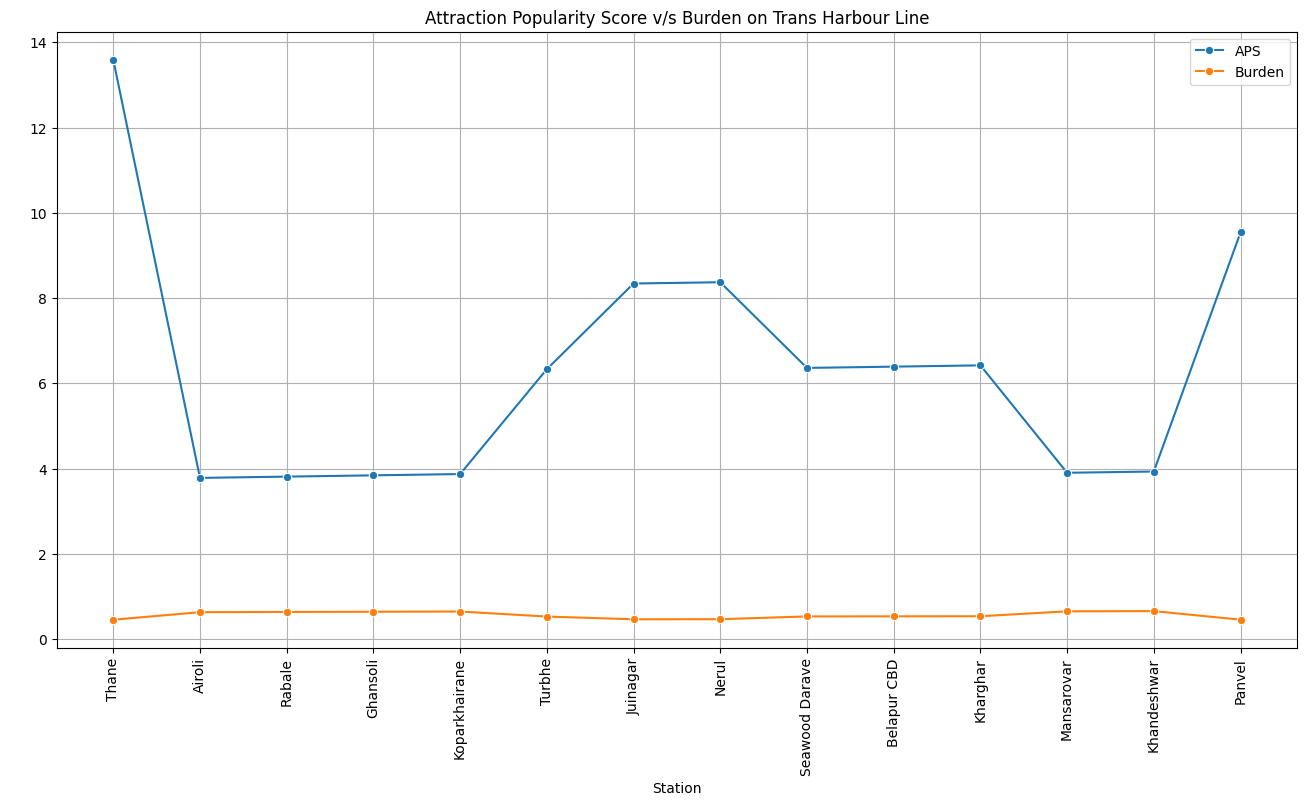

In [99]:
df1 = df[df['Line'] == 'Trans Harbour']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on Trans Harbour Line')
plt.ylabel(' ')
plt.grid()
plt.show()

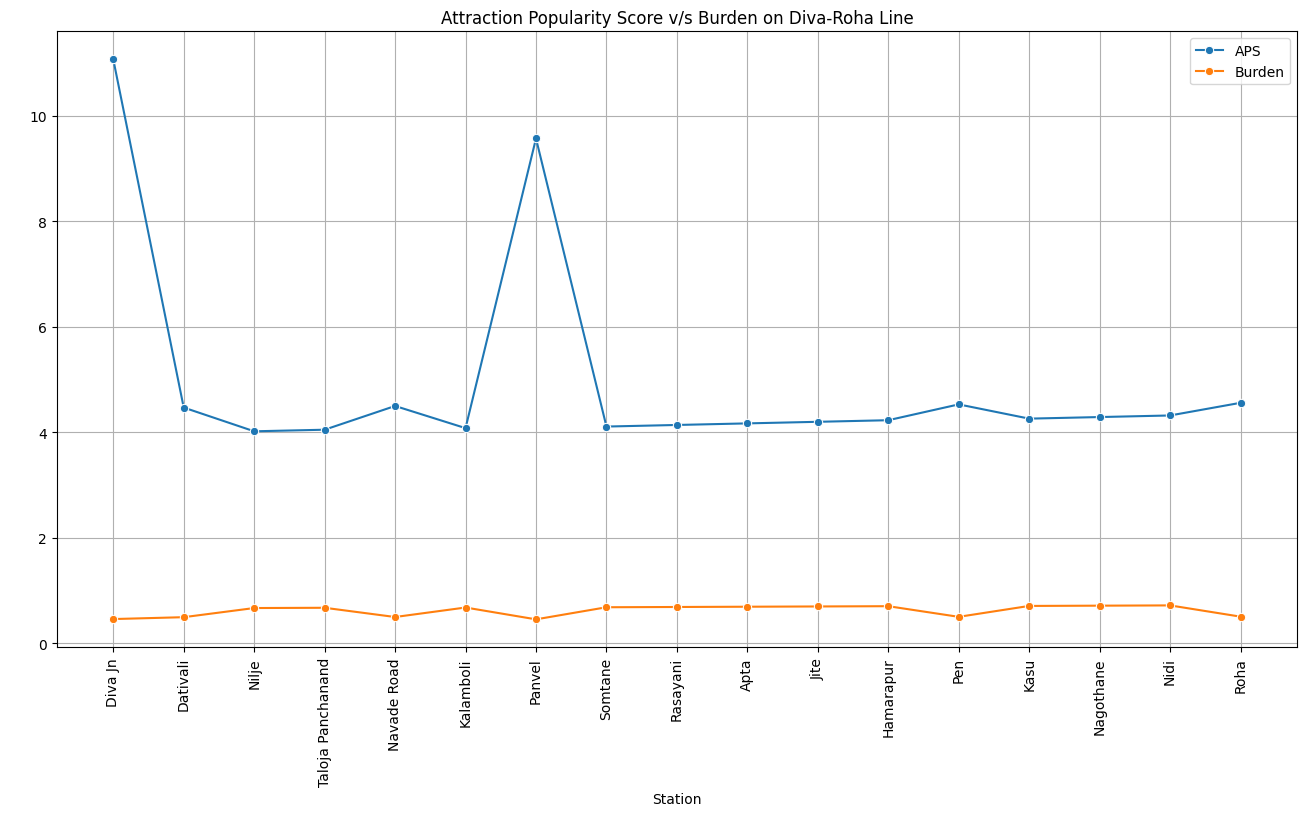

In [100]:
df1 = df[df['Line'] == 'Diva-Roha']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on Diva-Roha Line')
plt.ylabel(' ')
plt.grid()
plt.show()

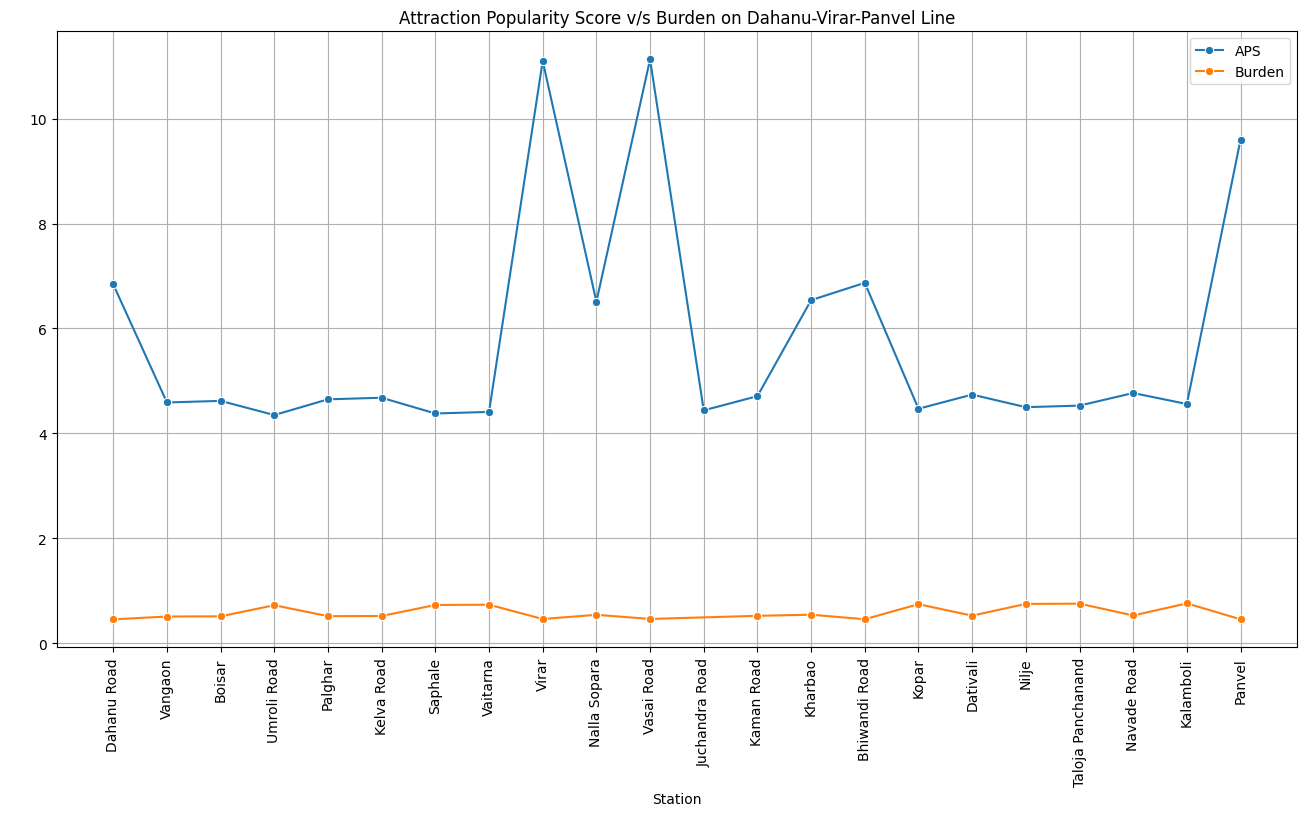

In [101]:
df1 = df[df['Line'] == 'Dahanu-Virar-Panvel']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on Dahanu-Virar-Panvel Line')
plt.ylabel(' ')
plt.grid()
plt.show()

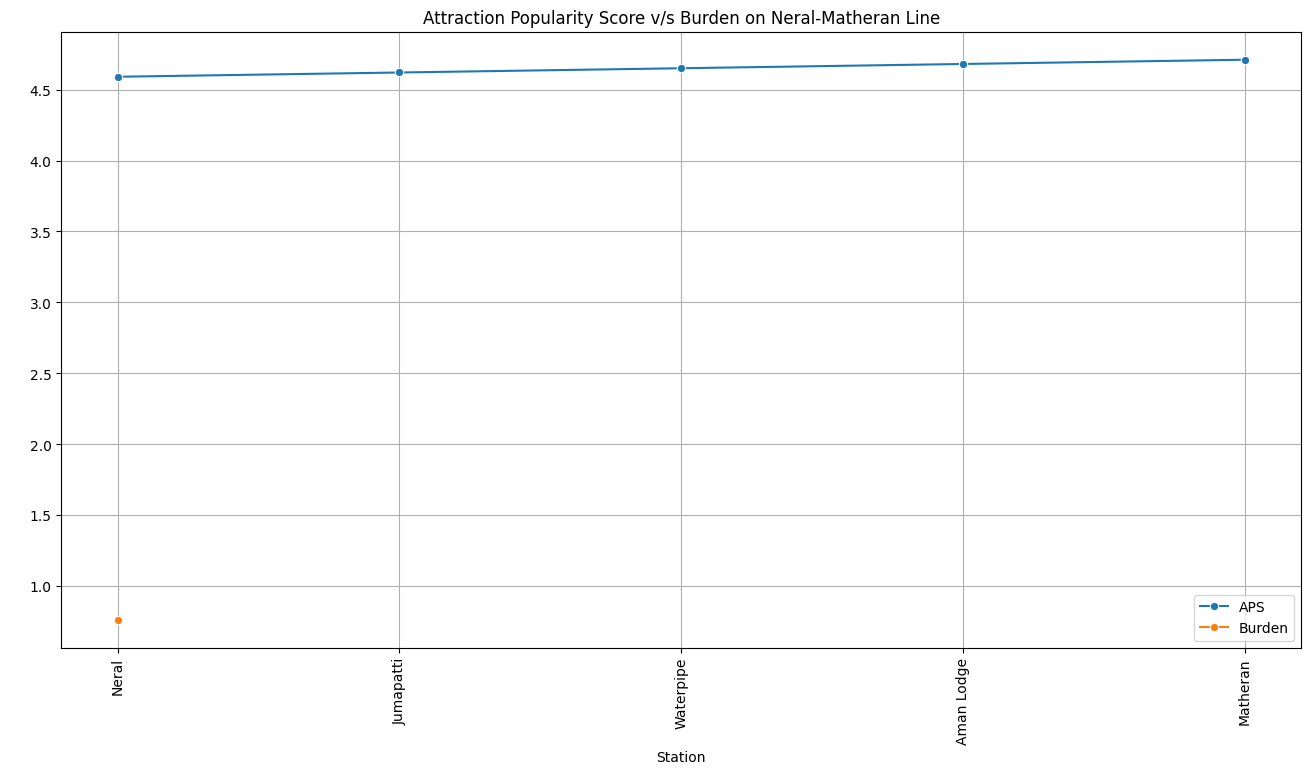

In [102]:
df1 = df[df['Line'] == 'Neral-Matheran']
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Station',y = 'Attraction Popularity Score',data = df1,label = 'APS',marker = 'o')
plt.xticks(rotation = 90)
sns.lineplot(x = 'Station',y = 'Burden',data = df1,label = 'Burden',marker = 'o')
plt.title('Attraction Popularity Score v/s Burden on Neral-Matheran Line')
plt.ylabel(' ')
plt.grid()
plt.show()

## Now since we found the Age of platforms let's form a scatterplot of Footfall and attraction popularity Score v/s age

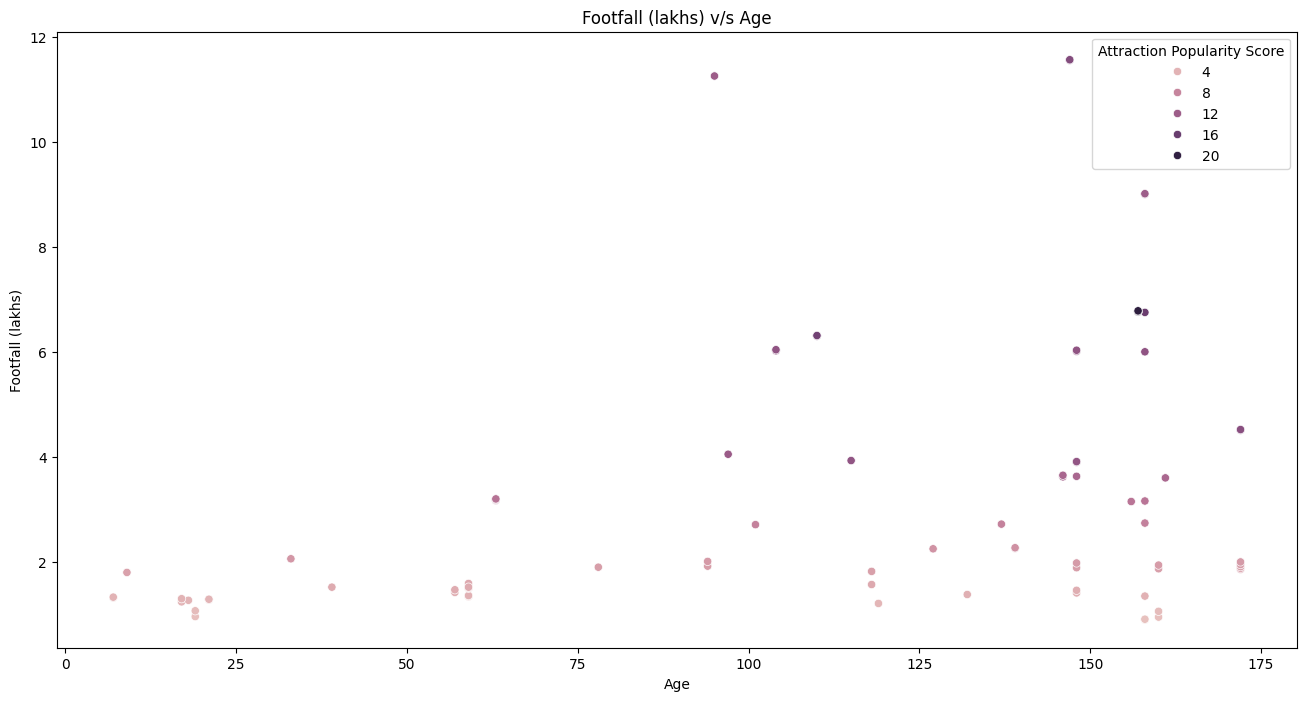

In [83]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = df,x = 'Age',y = 'Footfall (lakhs)',hue = 'Attraction Popularity Score')
plt.title('Footfall (lakhs) v/s Age')
plt.show()

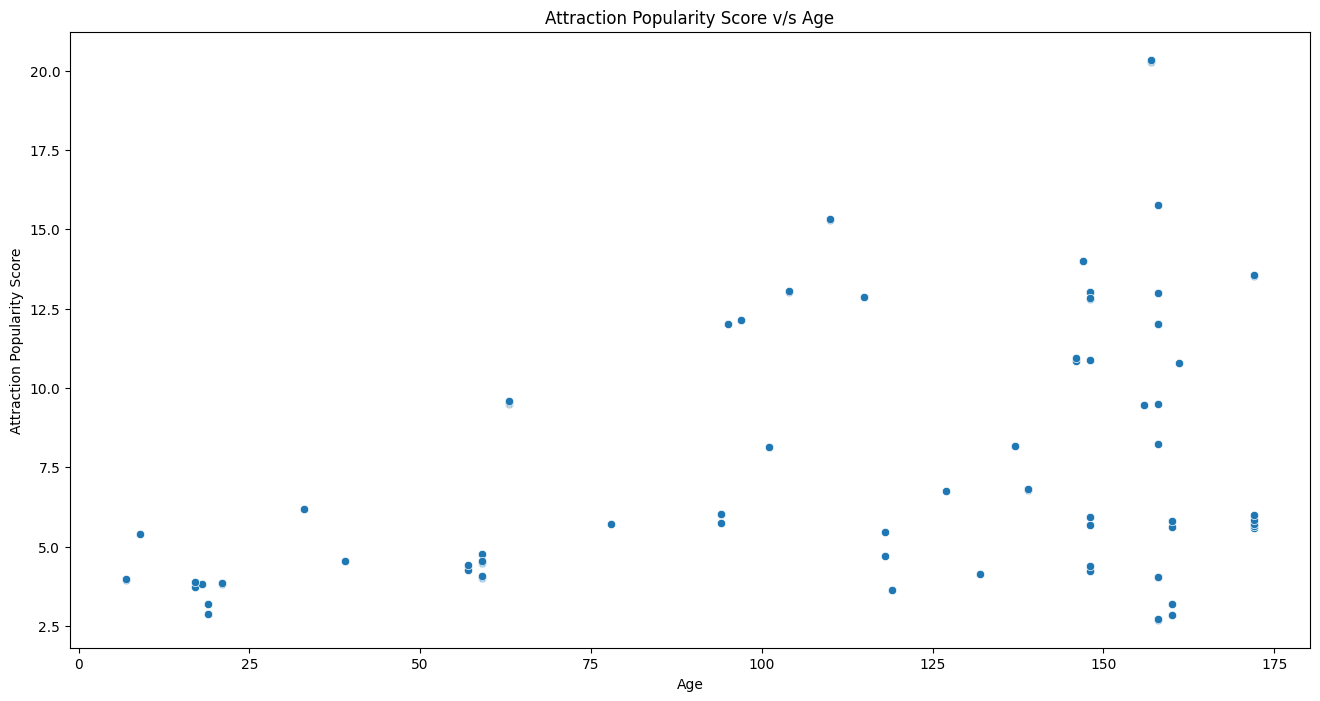

In [82]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = df,x = 'Age',y = 'Attraction Popularity Score')
plt.title('Attraction Popularity Score v/s Age')
plt.show()

### It is clearly visible most of the stations are old

### We can also find out the stats for each column

In [104]:
print(df.describe().T)

                                      count         mean        std      min  \
Distance From Previous of the Line    202.0     3.564356   2.744205     0.00   
Time taken From Previous of the Line  202.0     5.663366   6.186612     0.00   
Platforms                             202.0     3.910891   2.478159     1.00   
Tracks                                202.0     4.757426   2.660859     1.00   
Year of Opening                        83.0  1914.542169  52.801354  1853.00   
Footfall (lakhs)                      202.0     2.496436   2.043896     0.45   
Attraction Popularity Score           202.0     6.666782   3.855996     1.35   
Burden                                197.0     0.680875   0.468852     0.45   
Age                                    83.0   110.457831  52.801354     7.00   

                                             25%       50%        75%  \
Distance From Previous of the Line       2.00000     3.000     5.0000   
Time taken From Previous of the Line     3.00000     

## We also should make a graph of Platform v/s Tracks

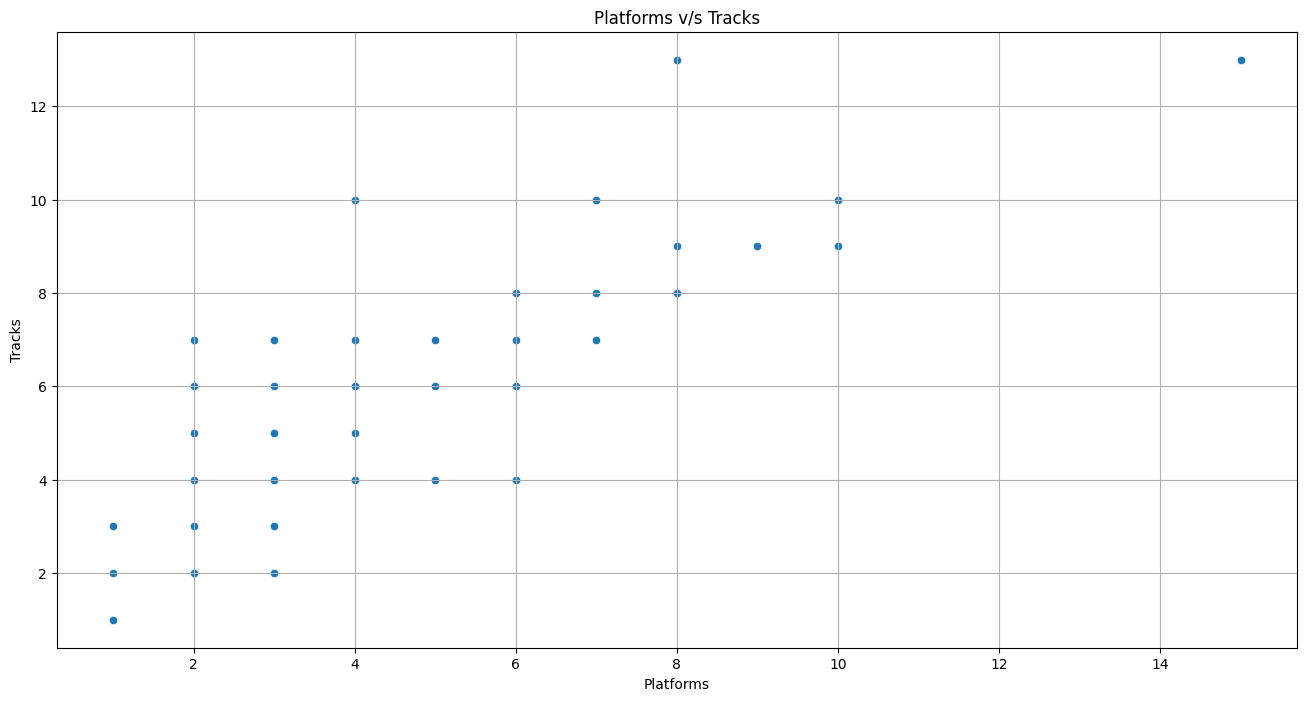

In [84]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = df,x = 'Platforms',y = 'Tracks')
plt.title('Platforms v/s Tracks')
plt.grid()
plt.show()